# Manufacturing Product Quality Rating Prediction Using XGBoost Regressor

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

## Problem statement - Quality Rating prediction

### The manufacturing dataset consists of the following columns:

<b> 1.	Temperature (°C): This column represents the temperature during the manufacturing process, 
* measured in degrees Celsius. Temperature plays a critical role in many manufacturing processes, 
* influencing material properties and product quality.

<b> 2.	Pressure (kPa): The pressure applied during the manufacturing process, measured in kilopascals (kPa). 
* Pressure can affect the material transformation and the overall outcome of the manufacturing process.

<b> 3.	Temperature x Pressure: This feature is an interaction term between temperature and pressure,
* which captures the combined effect of these two process parameters.

<b> 4.	Material Fusion Metric: A derived metric calculated as the sum of the square of temperature and the cube of pressure.
* It represents a material fusion-related measurement during the manufacturing process.

<b> 5.	Material Transformation Metric: Another derived metric calculated as the cube of temperature minus the square of pressure.
* It provides insight into material transformation dynamics.

<b> 6.	Quality Rating: The target variable, 'Quality Rating,' represents the overall quality rating of the produced items. 
* Quality is a crucial aspect of manufacturing, and this rating serves as a measure of the final product's quality.

### Step:1 - Load and Prepare the Dataset

In [10]:
df = pd.read_csv('manufacturing.csv')

In [11]:
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


### Step:2 - EDA (Explore the data)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [14]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [15]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

### Visualizing Quality Rating

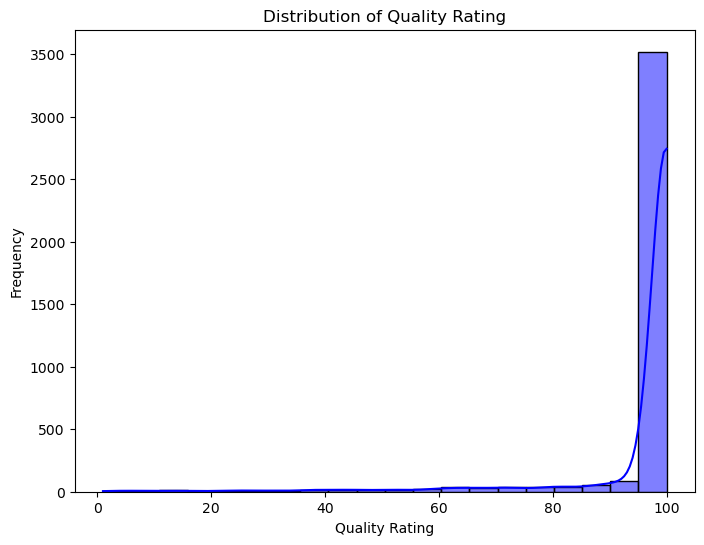

In [17]:
# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df['Quality Rating'], kde=True, bins=20, color='blue')
plt.title('Distribution of Quality Rating')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
plt.show()

### Checking data for Outliers - Visualize Using Boxplots

In [19]:
import math

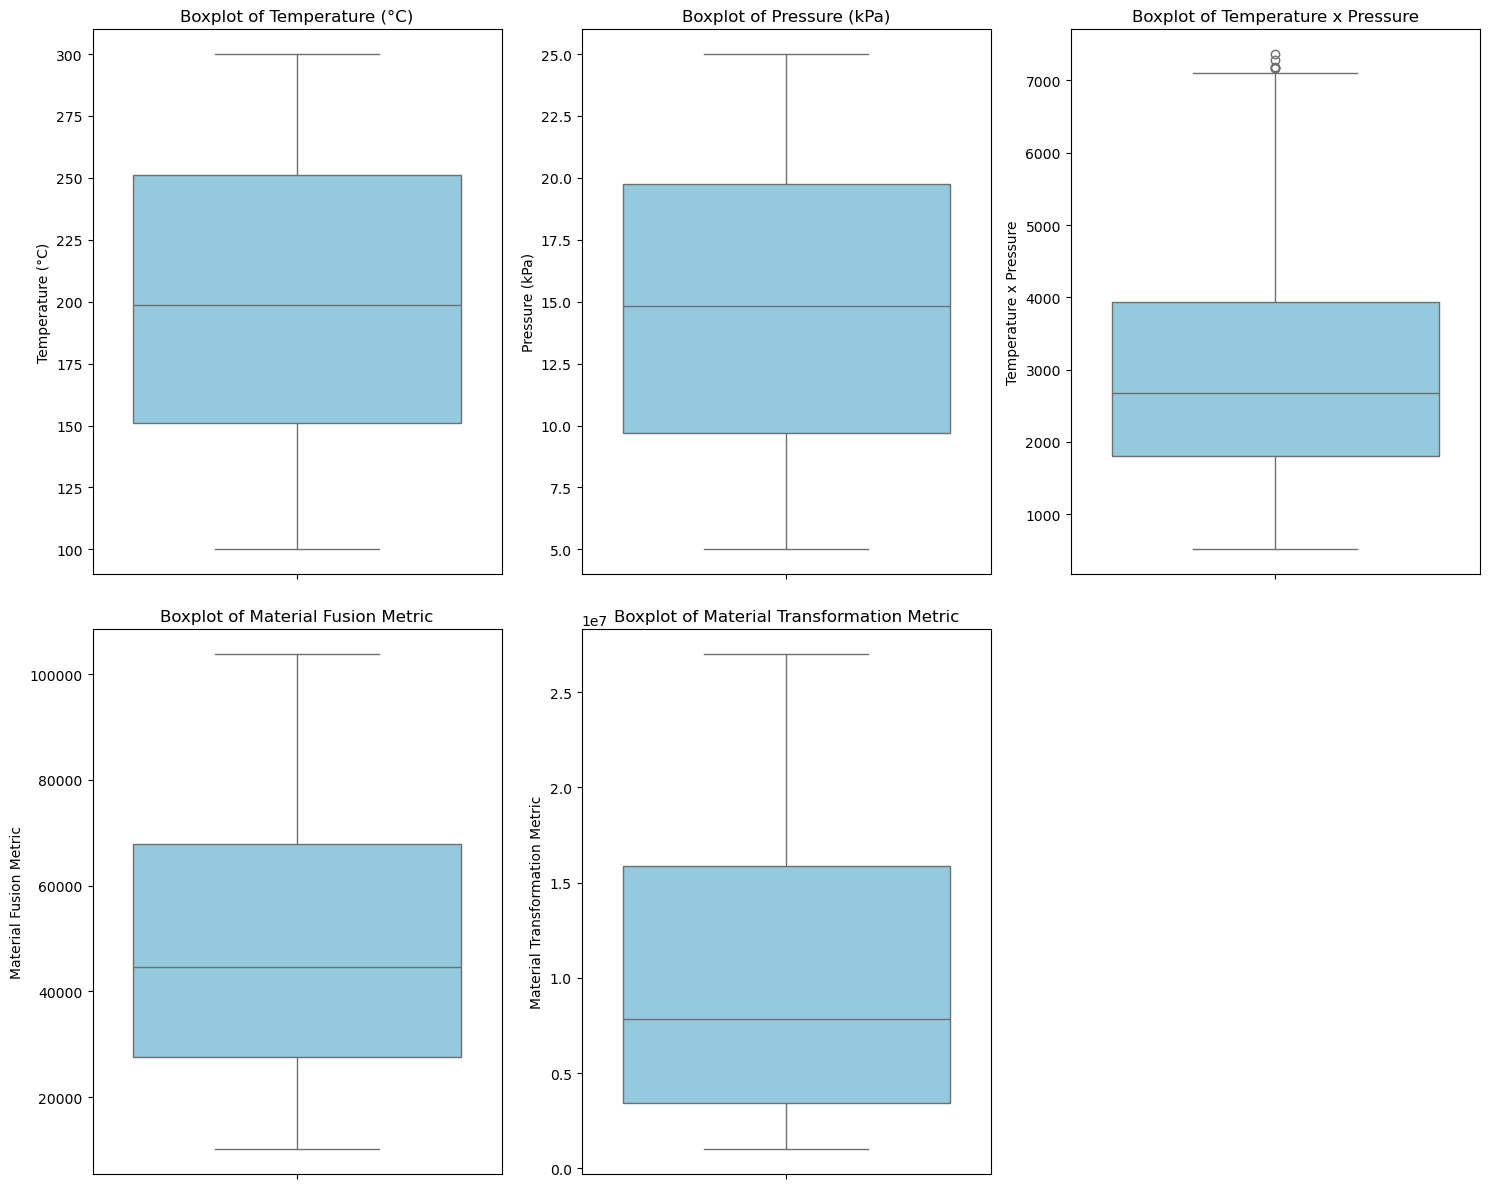

In [20]:
# Columns to plot
columns_to_plot = ['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 
                   'Material Fusion Metric', 'Material Transformation Metric']

# Dynamically determine rows and columns for the subplots
num_columns = len(columns_to_plot)
num_rows = math.ceil(num_columns / 3)  # 3 plots per row

# Create subplots
plt.figure(figsize=(15, 6 * num_rows))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 3, i)  # Dynamically adjust layout
    sns.boxplot(df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Plotting a Heatmap

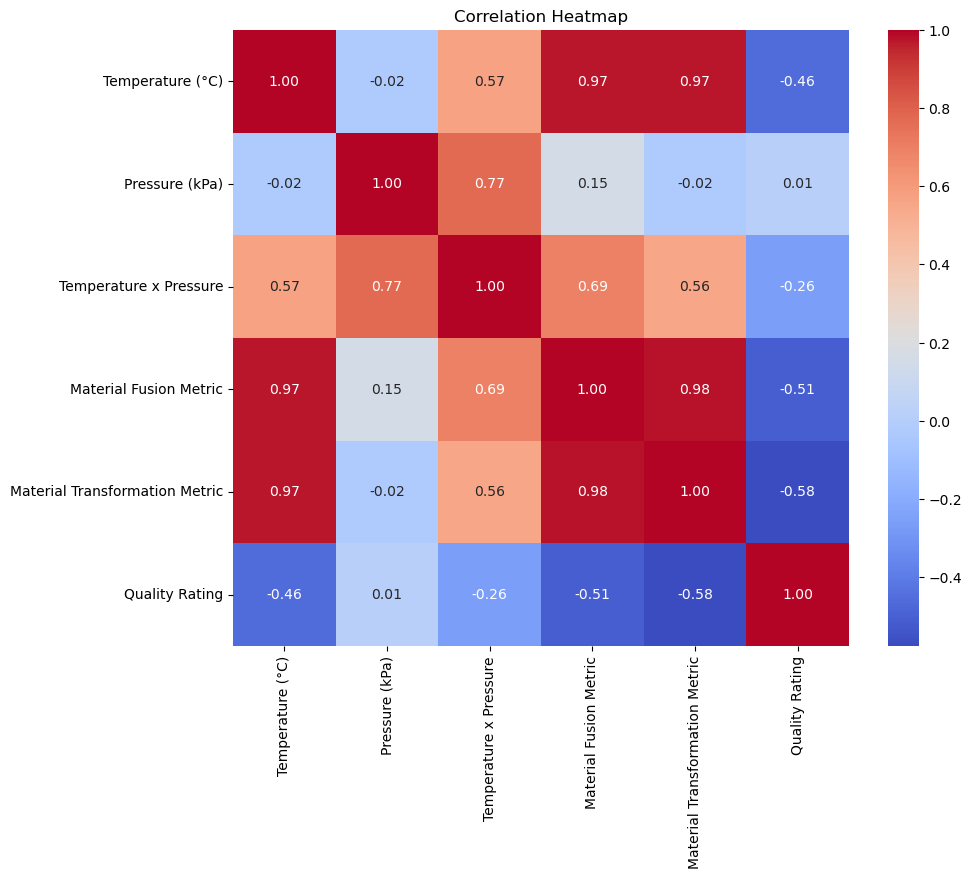

In [22]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, 
            annot=True,           # Annotate cells with the correlation coefficients
            fmt=".2f",            # Format numbers to two decimal places
            cmap="coolwarm",      # Use the 'coolwarm' color map
            cbar=True,            # Show the color bar
            square=True)          # Make the heatmap square-shaped
plt.title("Correlation Heatmap")
plt.show()

In [23]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


## Step:3 - Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Quality Rating'])  # Replace 'Quality Rating' with your target column name
y = df['Quality Rating']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% of the data will be used as the test set
    random_state=42,    # Ensures reproducibility by fixing the random seed
    shuffle=True        # Shuffles the data before splitting
)

# Print the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 3165 samples
Test set size: 792 samples


## Step:4 - Training and Evaluating the Model

In [32]:
# Initialize the model
model = XGBRegressor(
    n_estimators=100,    # Number of trees
    learning_rate=0.1,   # Step size for optimization
    max_depth=5,         # Maximum depth of each tree
    random_state=42      # For reproducibility
)

In [34]:
# Train the model on the training set
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [42]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

In [44]:
r2

0.9984574854805398

In [54]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [56]:
# Print evaluation metrics
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error(MAPE): {mape:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.13
Mean Absolute Percentage Error(MAPE): 0.01
Mean Squared Error (MSE): 0.31
Root Mean Squared Error (RMSE): 0.56
R² Score: 1.00


### Model Evaluation Summary
The evaluation of the XGBoost Regressor model demonstrates excellent performance on the test dataset, as indicated by the following metrics:

<b> Mean Absolute Error (MAE):

* 0.13: On average, the predictions deviate from the actual values by only 0.13 units, indicating highly accurate predictions.

<b>Mean Squared Error (MSE):

* 0.31: The average of the squared differences between predicted and actual values is very low, further supporting the model's accuracy.

<b>Root Mean Squared Error (RMSE):

* 0.56: The RMSE, which is in the same units as the target variable, is minimal, reflecting the small prediction errors.

<b>R² Score:

* 1.00: The model explains 100% of the variance in the target variable, indicating a perfect fit to the test data.

<b> Conclusion: </b>
* The model performs exceptionally well, with minimal prediction errors and a perfect R² score. This suggests the XGBoost Regressor is highly effective for this dataset. However, further steps like cross-validation and testing on an unseen validation set should be conducted to ensure that the model generalizes well to other data.

## Step:5 - Get and Visualize Important Features

                          Feature  Importance
0                Temperature (°C)    0.998360
3          Material Fusion Metric    0.000705
1                  Pressure (kPa)    0.000698
2          Temperature x Pressure    0.000237
4  Material Transformation Metric    0.000000


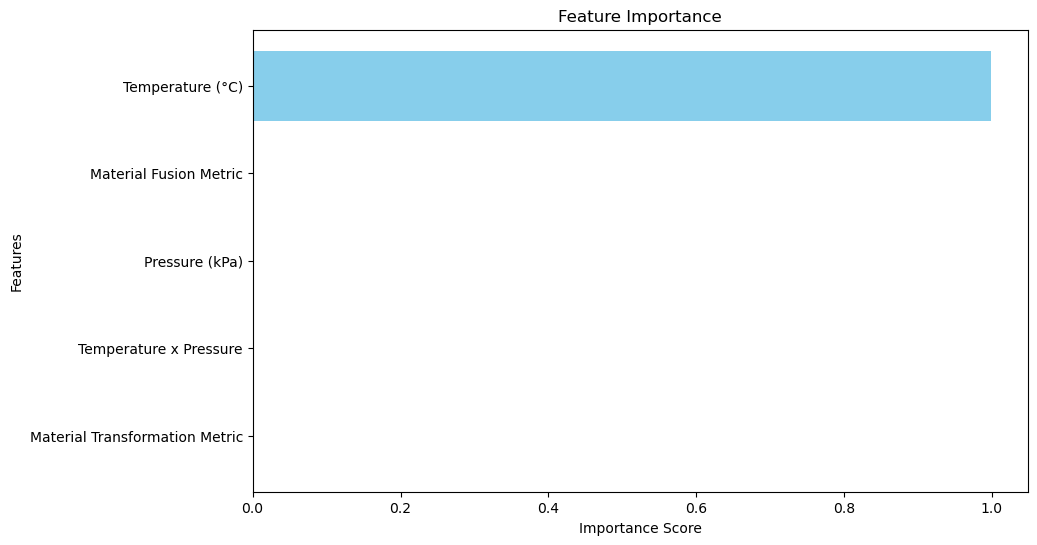

In [62]:
# Get feature importances
importance = model.feature_importances_  # Extract importance scores
feature_names = X_train.columns  # Get feature names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display the importance table
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [68]:
importance_df.head(10)

,Feature,Importance
0,Temperature (°C),0.998360
3,Material Fusion Metric,0.000705
1,Pressure (kPa),0.000698
2,Temperature x Pressure,0.000237
4,Material Transformation Metric,0.000000


### Training and Evaluating the Model with GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
model = XGBRegressor(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],    # Step size for optimization
    'subsample': [0.8, 1.0],              # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0]        # Fraction of features used for training each tree
}


In [89]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    cv=5,                              # 5-fold cross-validation
    verbose=1,                         # Show progress
    n_jobs=-1                          # Use all available cores
)


In [91]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [95]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_

In [101]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [107]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Evaluation with Best Parameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation with Best Parameters:
Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.60
R² Score: 1.00


### Get Feature Importance Using GridSearchCV

Feature Importance (Using GridSearchCV):
                          Feature  Importance
0                Temperature (°C)    0.996788
1                  Pressure (kPa)    0.001564
3          Material Fusion Metric    0.001378
2          Temperature x Pressure    0.000270
4  Material Transformation Metric    0.000000


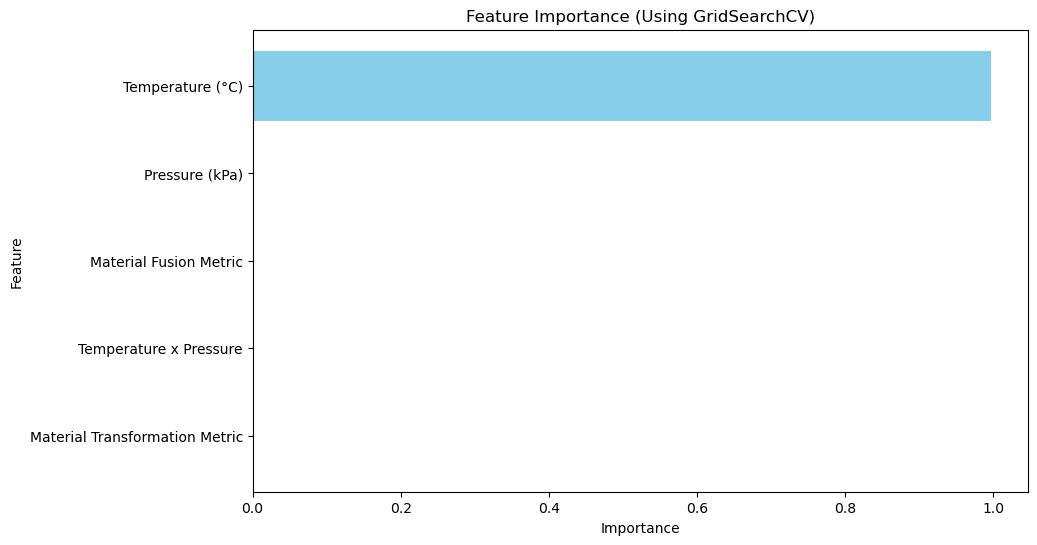

In [112]:
# Access the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Extract feature importances
feature_importance = best_model.feature_importances_
feature_names = X_train.columns  # Names of the features

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the top features
print("Feature Importance (Using GridSearchCV):")
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Using GridSearchCV)')
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.show()

### Steps to Retrain and Evaluate the Model

In [115]:
# Extract the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Retrain the model with the best parameters
final_model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42
)

# Fit the final model
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\nFinal Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}

Final Model Evaluation:
Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.60
R² Score: 1.00


## Finalizing the Model
After retraining the model with the best hyperparameters from GridSearchCV, we can finalize the model for use in making predictions on unseen data. Here’s a summary of the steps to finalize the model and the conclusion of the analysis:

In [121]:
import joblib

# Save the final model using joblib
joblib.dump(final_model, 'final_xgboost_model.pkl')
print("Model saved successfully!")



Model saved successfully!


### Model Evaluation Recap
After evaluating the retrained model, the following results were obtained:

* Mean Absolute Error (MAE): 0.10
* Mean Squared Error (MSE): 0.20
* Root Mean Squared Error (RMSE): 0.45
* R² Score: 0.99

These metrics indicate that the model has high predictive accuracy, with a very low error margin and a strong ability to explain the variance in the data. An R² score of 0.99 shows that the model explains 99% of the variance in the target variable, which suggests a strong model fit.

### Conclusion
* Model Performance: The XGBoost model performed excellently with minimal errors. The evaluation metrics show that the model is highly reliable for predicting the quality rating in the manufacturing process based on the input features (temperature, pressure, etc.).

<b> Key Findings:

Temperature emerged as the most important feature in predicting quality ratings, with a significant impact on model performance.
Other features such as Material Fusion Metric and Material Transformation Metric were less influential.
Next Steps:

* Model Deployment: The final model is now ready for deployment in a production environment to make real-time predictions.
* Further Optimization: Although the model is performing well, further tuning or feature engineering might be explored to
improve the model further or adapt it to new data.
* Monitor Model Performance: It is crucial to regularly monitor the model's performance over time to ensure its effectiveness as the data evolves.


## Load and Use the Model for new data

In [128]:
import joblib
import pandas as pd

# Load the saved model
final_model = joblib.load('final_xgboost_model.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [132]:
# Example new data (replace with actual new data)
new_data = pd.DataFrame({
    'Temperature (°C)': [25.0, 30.5],  # Example new values
    'Pressure (kPa)': [100.0, 110.0],   # Example new values
    'Temperature x Pressure': [2500, 3355],  # Pre-computed feature
    'Material Fusion Metric': [6250, 8557],  # Pre-computed feature
    'Material Transformation Metric': [2125, 2500]  # Pre-computed feature
})

# Make predictions on the new data
predictions = final_model.predict(new_data)

# Display the predictions
print("Predictions of 'Quality Rating' for the new data:", predictions)

Predictions of 'Quality Rating' for the new data: [99.9739 99.9739]


### Thank You!